In [2]:
import numpy as np
import pandas as pd
import pickle
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('model\lda_model.pkl', 'rb') as f:
  lda_model = pickle.load(f) #import lda model
  
data = pd.read_csv('dataset/DatasetLegal.csv') #read data
question_data = data['question']

with open('model/topic_dict.pkl', 'rb') as f:
  topic_dict = pickle.load(f)

with open('model/question_lda.pkl', 'rb') as f:
   question_lda = pickle.load(f)

for each_doc in question_lda:
    i = 0
    for each_topic in each_doc:
        if(each_topic[0] == i): i+=1
        else: 
            each_doc.insert(i, (i, 0))
            i+=1
    while(i < 6):
        each_doc.append((i, 0))
        i+=1
list_topic = []
for each_doc in question_lda:
    list_topic_each_doc = []
    for each_topic in each_doc:
        list_topic_each_doc.append(each_topic[1])
    list_topic.append(list_topic_each_doc)
doc_topic_dist = np.array(list_topic)


In [4]:
umap_model = umap.UMAP(n_components=2)
umap_data = umap_model.fit_transform(doc_topic_dist)

In [5]:
topic_assignments = [topic.index(max(topic)) for topic in list_topic]

In [6]:
print(umap_data)

[[10.601282    1.3943675 ]
 [ 8.8176      0.81534374]
 [-0.3671349   6.765127  ]
 ...
 [ 3.1517267   6.1936088 ]
 [ 4.998756    6.153947  ]
 [ 5.1437006   5.851807  ]]


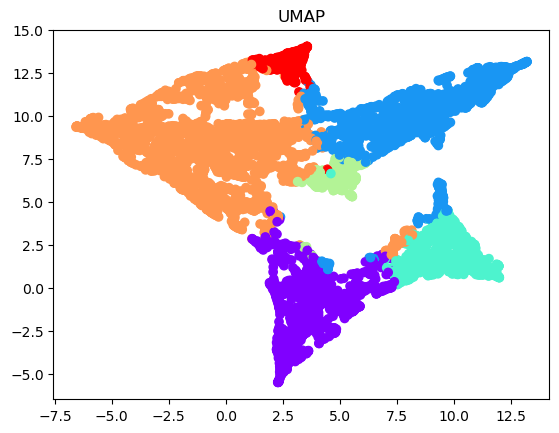

In [7]:
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=topic_assignments, cmap='rainbow')
plt.title("UMAP")
plt.show()

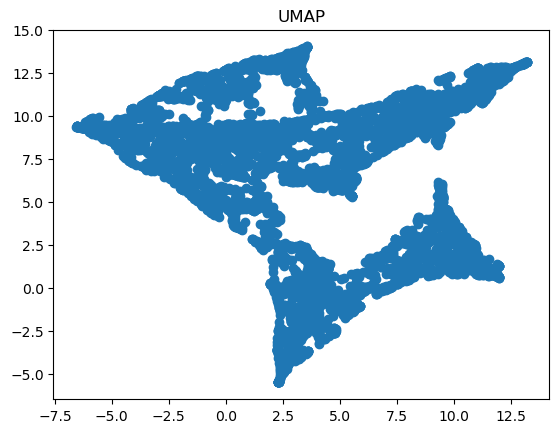

In [8]:
plt.scatter(umap_data[:, 0], umap_data[:, 1])
plt.title("UMAP")
plt.show()

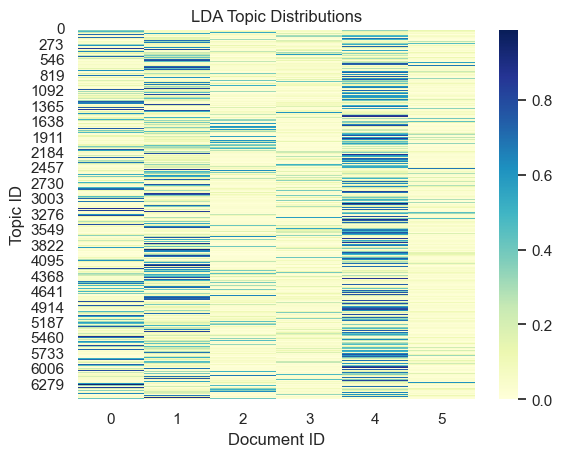